<a href="https://colab.research.google.com/github/RizwanMunawar/Cats-Vs-Dogs-Classification-CNN-Data-Augmentation/blob/master/Cats_vs_dogs_classification_using_data_augmentation_and_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Importing Libraries

In [ ]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

###### Mounting Drive

In [ ]:
 drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###### Set path for testing , training and validation directories

In [ ]:
path = '/content/drive/My Drive/Classification Datasets/Cats_vs_dogs_classification_dataset'
train_dir = '/content/drive/My Drive/Classification Datasets/Cats_vs_dogs_classification_dataset/train'
validation_dir = '/content/drive/My Drive/Classification Datasets/Cats_vs_dogs_classification_dataset/validation'
test_dir = '/content/drive/My Drive/Classification Datasets/Cats_vs_dogs_classification_dataset/test'

In [ ]:
train_cats_dir = '/content/drive/My Drive/Classification Datasets/Cats_vs_dogs_classification_dataset/train/cats'
train_dogs_dir = '/content/drive/My Drive/Classification Datasets/Cats_vs_dogs_classification_dataset/train/dogs'

validation_cats_dir = '/content/drive/My Drive/Classification Datasets/Cats_vs_dogs_classification_dataset/validation/cats'
validation_dogs_dir ='/content/drive/My Drive/Classification Datasets/Cats_vs_dogs_classification_dataset/validation/dogs'

test_cats_dir = '/content/drive/My Drive/Classification Datasets/Cats_vs_dogs_classification_dataset/test/cats'
test_dogs_dir = '/content/drive/My Drive/Classification Datasets/Cats_vs_dogs_classification_dataset/test/dogs'

In [ ]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_validation = len(os.listdir(validation_cats_dir))
num_dogs_validation = len(os.listdir(validation_dogs_dir))

num_cats_test = len(os.listdir(test_cats_dir))
num_dogs_test = len(os.listdir(test_dogs_dir))

##### Printing Total Numbers of Testing, Training and validation images

In [ ]:
print('Total Training Images of Cats',num_cats_train)
print('Total Training Images of Dogs',num_dogs_train)
print('\n************************\n')
print('Total Validation Images of Cats',num_cats_validation)
print('Total Validation Imagges of Dogs',num_dogs_validation)
print('\n************************\n')
print('Total Testing Images of Cats',num_cats_test)
print('Total Testing Images of Dogs',num_dogs_test)

Total Training Images of Cats 850
Total Training Images of Dogs 850

************************

Total Validation Images of Cats 352
Total Validation Imagges of Dogs 358

************************

Total Testing Images of Cats 304
Total Testing Images of Dogs 300


In [ ]:
total_train = num_cats_train+num_dogs_train
total_validation = num_cats_validation+num_dogs_validation
total_test = num_cats_test+num_dogs_test

In [ ]:
print('Total Training Images',total_train)
print('Total Validation Images',total_validation)
print('Total Testing Images',total_test)

Total Training Images 1700
Total Validation Images 710
Total Testing Images 604


###### Defining Batch-size and image_shape for deep learning model

In [ ]:
BATCH_SIZE = 120
IMG_SHAPE  = 150 

###### Function for plotting images

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

##### Applying Data Agumentation

In [ ]:
image_gen_train = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,
                                     zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 1700 images belonging to 2 classes.


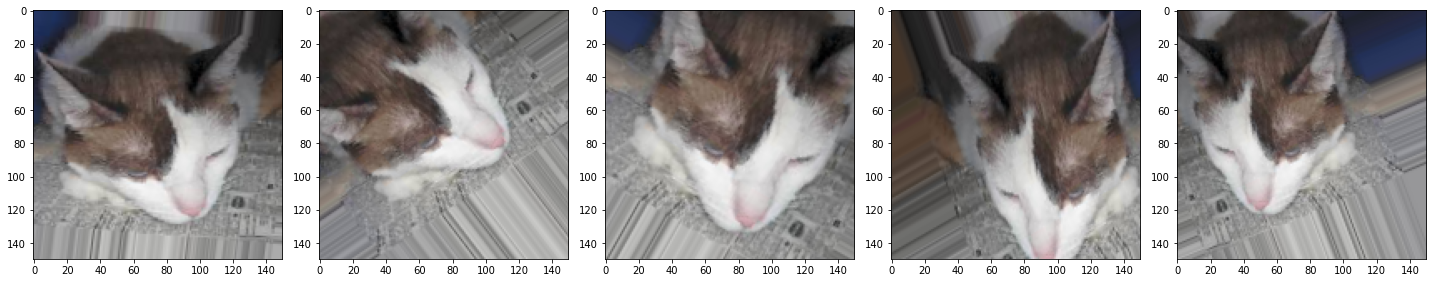

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

###### Pre-Processing for testing and validation data

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

image_gen_test = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=test_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 710 images belonging to 2 classes.
Found 604 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

##### Defining Model Parameters

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

###### Checking Model parameters details

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

###### Let's Start Training

In [ ]:
epochs=100
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE))),
    verbose= 1
)

Epoch 1/100
15/15 [==============================] - 87s 6s/step - loss: 0.7287 - accuracy: 0.5035 - val_loss: 0.6941 - val_accuracy: 0.4958
Epoch 2/100
15/15 [==============================] - 87s 6s/step - loss: 0.6941 - accuracy: 0.5012 - val_loss: 0.6920 - val_accuracy: 0.5662
Epoch 3/100
15/15 [==============================] - 86s 6s/step - loss: 0.6921 - accuracy: 0.5071 - val_loss: 0.7034 - val_accuracy: 0.4958
Epoch 4/100
15/15 [==============================] - 86s 6s/step - loss: 0.6942 - accuracy: 0.5224 - val_loss: 0.6908 - val_accuracy: 0.4958
Epoch 5/100
15/15 [==============================] - 86s 6s/step - loss: 0.6894 - accuracy: 0.5218 - val_loss: 0.6884 - val_accuracy: 0.5169
Epoch 6/100
15/15 [==============================] - 86s 6s/step - loss: 0.6828 - accuracy: 0.5559 - val_loss: 0.6978 - val_accuracy: 0.5676
Epoch 7/100
15/15 [==============================] - 86s 6s/step - loss: 0.6903 - accuracy: 0.5876 - val_loss: 0.6848 - val_accuracy: 0.5761
Epoch 8/100
1

###### Visualization of validation-Training (Accuracy and Loss)

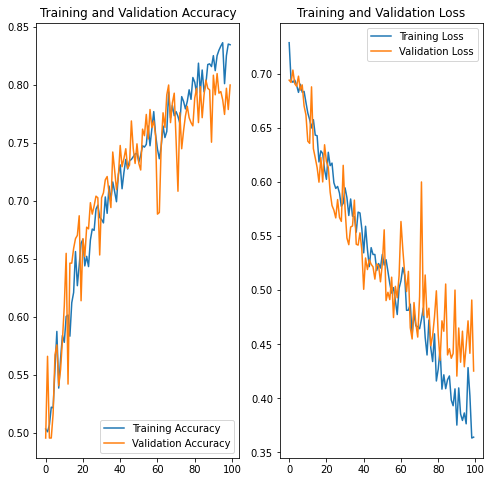

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###### Testing model

In [ ]:
results = model.evaluate(test_data_gen)
print("test_loss, test accuracy",results)

6/6 [==============================] - 7s 1s/step - loss: 0.4216 - accuracy: 0.7980
test_loss, test accuracy [0.42155420780181885, 0.7980132699012756]


###### Saving model

In [ ]:
#t = time.time()
#export_path_keras = "./{}.h5".format(int(t))
#print(export_path_keras)
#model.save(export_path_keras)
model.save('Cat_vs_dogs_classification.h5')